# Part 01 - Exercise 3 (n-gram language models)

## Organizing our Data

At first, we downloaded via *nltk* package a plenty of corpus such as 'reuters', 'brown' etc. Moreover, we downloaded the method tokenization 'punkt' via nltk package.
We splitted our data into training, development and test set and we transformed any rare word (freq<=10) or out-of-vocabulary word to the special token 'UNK'.
As we can see from the printed console, a lot of words transformed into the special token 'UNK' in order to be able to handle the unknown words better.

In [1]:
# If you running for first time uncomment the following 3 lines iot download the corpus
import nltk
# nltk.download('punkt')
# nltk.download('reuters')
# nltk.download('brown')
# nltk.download('alpino')
# nltk.download('indian')
# nltk.download('genesis')
# nltk.download('gutenberg')
# nltk.download('inaugural')
# nltk.download('treebank')
# nltk.download('product_reviews_1')
# nltk.download('product_reviews_2')
from nltk.corpus import reuters, brown, alpino, indian, genesis, gutenberg, inaugural, treebank, product_reviews_1, product_reviews_2
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from collections import Counter
from nltk.util import ngrams
import math
from more_itertools import windowed


# Load lots of corpus from NLTK package
sentences = (reuters.sents() + brown.sents() + alpino.sents() + indian.sents() +
             genesis.sents() + gutenberg.sents() + inaugural.sents() + treebank.sents()
             + product_reviews_1.sents() + product_reviews_2.sents())

print(len(sentences))
# Splitting data into Training, Development and Test set
train_sents, test_sents = train_test_split(sentences, test_size=0.3, random_state=42)
dev_sents, test_sents = train_test_split(test_sents, test_size=0.5, random_state=42)


# Transform the train sentences into words
train_words = [word for sentence in train_sents for word in sentence]
freq_dist_train = FreqDist(train_words)

# Replace rare words in train set
cleaned_train_sentences = []
for sentence in train_sents:
    cleaned_train_sentence = [word if freq_dist_train[word] > 10 else '<UNK>' for word in sentence]
    cleaned_train_sentences.append(cleaned_train_sentence)

# Build our vocab based on training set
vocab = set([word for sentence in cleaned_train_sentences for word in sentence])

print(f'The total size of our vocabulary is: {len(vocab)}')


print('Example sentence of our training set:')   
print('|'.join(cleaned_train_sentences[0]))

# Transform the development sentences into words
dev_words = [word for sentence in dev_sents for word in sentence]
freq_dist_dev = FreqDist(dev_words)

# Replace rare words or Out-of-Vocabulary words in dev set
cleaned_dev_sentences = []
for sentence in dev_sents:
    cleaned_dev_sentence = [word if word in vocab else '<UNK>' for word in sentence]
    cleaned_dev_sentences.append(cleaned_dev_sentence)

print('Example sentence of our development set:')
print('|'.join(cleaned_dev_sentences[0]))

# Transform the test sentences into words
test_words = [word for sentence in test_sents for word in sentence]
freq_dist_test = FreqDist(test_words)

# Replace rare words or Out-of-Vocabulary words in test set
cleaned_test_sentences = []
for sentence in test_sents:
    cleaned_test_sentence = [word if word in vocab else '<UNK>' for word in sentence]
    cleaned_test_sentences.append(cleaned_test_sentence)

print('Example sentence of our test set:')
print('|'.join(cleaned_test_sentences[0]))

251821
The total size of our vocabulary is: 20547
Example sentence of our training set:
The|potential|purchase|of|the|interest|in|Champlin|followed|its|earlier|acquisition|of|a|part|interest|in|Southland|Corp|'|s|&|lt|;|<UNK>|>|<UNK>|Petroleum|Corp|subsidiary|.
Example sentence of our development set:
The|company|could|spend|between|250|mln|and|500|mln|dlrs|to|buy|another|non|-|copper|firm|,|<UNK>|said|,|citing|100|mln|dlrs|of|cash|and|580|mln|dlrs|of|<UNK>|bank|credit|.
Example sentence of our test set:
Robert|D|.|Hunter|,|Chase|Manhattan|area|executive|for|Europe|,|Africa|and|the|Middle|East|,|said|at|a|news|conference|that|plans|to|broaden|the|bank|'|s|activities|on|the|Italian|market|have|not|been|<UNK>|,|however|.


## i) Build our unigram, bigram & trigram model

In the following block of code we used Counter() in order to cosntruct our ngram models (unigram, bigram, trigram) and simultaneously to count the frequency of each word. In the printed console we can observe the most common words for each ngram model.

In [6]:
from pprint import pprint

# Build unigram, bigram and trigram counters for our training set
unigram_counter = Counter()
bigram_counter = Counter()
trigram_counter = Counter()

for sent in cleaned_train_sentences:

    unigram_counter.update([gram for gram in ngrams(sent, 1, pad_left=True, pad_right=True,
                                                    left_pad_symbol='<s>', right_pad_symbol='<e>')])
    bigram_counter.update([gram for gram in ngrams(sent, 2, pad_left=True, pad_right=True,
                                                       left_pad_symbol='<s>', right_pad_symbol='<e>')])
    trigram_counter.update([gram for gram in ngrams(sent, 3, pad_left=True, pad_right=True,
                                                        left_pad_symbol='<s>', right_pad_symbol='<e>')])

print('10 most common words for unigram counter:')
pprint(unigram_counter.most_common(10))
print('10 most common words for bigram counter:')
pprint(bigram_counter.most_common(10))
print('10 most common words for trigram counter:')
pprint(trigram_counter.most_common(10))

10 most common words for unigram counter:
[(('<UNK>',), 273451),
 ((',',), 255436),
 (('the',), 190786),
 (('.',), 177650),
 (('of',), 109922),
 (('and',), 102719),
 (('to',), 82492),
 (('in',), 61532),
 (('a',), 61322),
 ((':',), 38915)]
10 most common words for bigram counter:
[(('.', '<e>'), 141917),
 (('<UNK>', '<UNK>'), 39507),
 ((',', 'and'), 38258),
 (('<UNK>', ','), 33467),
 (('of', 'the'), 27334),
 (('<s>', '<UNK>'), 18892),
 (('<UNK>', '.'), 18367),
 (('the', '<UNK>'), 16888),
 (('in', 'the'), 16722),
 ((',', '<UNK>'), 15518)]
10 most common words for trigram counter:
[(('.', '<e>', '<e>'), 141917),
 (('<s>', '<s>', '<UNK>'), 18892),
 (('<UNK>', '.', '<e>'), 17026),
 (('<s>', '<s>', 'The'), 14643),
 (('<UNK>', '<UNK>', '<UNK>'), 12295),
 (('<s>', '<s>', '"'), 10128),
 (('?', '<e>', '<e>'), 7640),
 (('&', 'lt', ';'), 6096),
 (('said', '.', '<e>'), 6017),
 (('."', '<e>', '<e>'), 5743)]


## Calculation of bigram and trigram probabilities via Laplace smoothing

In the following block of code we constructed a function which is responsible for calculating the probability of a ngram (bigram or trigram) model.
We used Laplace smoothing for this purpose. We also added the special tokens in order to include them in the size of the vocabulary.

In [7]:
# Define the hyperparameter alpha. Fine-tuning on the development set
alpha = 0.1

# Sum the tokens for the whole corpus (training, dev & test sets)
tokens = [token for sent in sentences for token in sent]
# Calculate vocabulary size (including any special tokens)
special_tokens = ['<s>', '<e>']
vocab_size = len(vocab) + len(special_tokens)
print(f'The total size of our vocabulary size based on the training set and special tokens is: {vocab_size}')


def calc_ngram_proba(ngram_counter, ngram_minus_one_counter, ngram, alpha, vocab_size):
    """
    Calculate ngram probability with Laplace smoothing
    :param bigram_counter: Counter which the key is a tuple of ngram and value its frequency
    :param gram_counter: Counter which the key is a tuple of n-1gram and value its frequency
    :param ngram: tuple
    :param alpha: float hyperparameter for Laplace smoothing
    :param vocab_size: int value which defines the whole size of the corpus
    :return: float probability of the ngram inside the corpus
    """
    ngram_count = ngram_counter[ngram]
    context = ngram[:-1]
    if context == ('<s>', '<s>',) or context == ('<s>',):
        ngram_minus_one_count = len(cleaned_train_sentences)
    else:
        ngram_minus_one_count = ngram_minus_one_counter[context]
    if ngram_count>ngram_minus_one_count:
        print(f'The following ngram occurs an error in the counter: {ngram}')
    ngram_prob = (ngram_count + alpha) / (ngram_minus_one_count + (alpha * vocab_size))
    return math.log2(ngram_prob)


The total size of our vocabulary size based on the training set and special tokens is: 20549


## ii) Calculation of probabilities, Cross-Entropy and Perplexity for our bigram model (Laplace smoothing)

In [8]:
# Calculate bigram probability and Cross-Entropy of sentences in the test set
total_log_proba_bigram = 0.0
for sent in cleaned_test_sentences:
    # Pad the sentence with '<s>' and '<e>' tokens
    padded_sent = ['<s>'] + sent + ['<e>']

    # Iterate over the bigrams of the sentence
    for first_token, second_token in windowed(padded_sent, 2):
        # if first_token == '<s>': # Avoid calculating that because unigram counter does not have counts for <s>
        #     pass
        # else:
        bigram = (first_token, second_token)
        bigram_prob = calc_ngram_proba(bigram_counter, unigram_counter, bigram, alpha, vocab_size)
        total_log_proba_bigram += bigram_prob

# Calculation of total tokens for test set, including only 'end' token for each sentence
num_tokens = sum(len(sent) + 2 for sent in cleaned_test_sentences)

cross_entropy_bigram = - total_log_proba_bigram / num_tokens
print(f"The total Cross-Entropy of bigram model for our Test set is: {cross_entropy_bigram:.3f}")

# Calculation of the perplexity of bigram model for the test set

bigram_perplexity = 2 ** (cross_entropy_bigram)
print(f"Perplexity of bigram model for Test Set: {bigram_perplexity:.3f}")

The total Cross-Entropy of bigram model for our Test set is: 7.834
Perplexity of bigram model for Test Set: 228.135


## Calculation of probabilities, Cross-Entropy and Perplexity for our trigram model (Laplace smoothing)

In [9]:
# Calculate trigram probability and Cross-Entropy of sentences in the test set
total_log_proba_trigram = 0.0
for sent in cleaned_test_sentences:
    # Pad the sentence with '<s>' and '<e>' tokens
    padded_sent = ['<s>'] + ['<s>'] + sent + ['<e>']

    # Iterate over the bigrams of the sentence
    for first_token, second_token, third_token in windowed(padded_sent, 3):
        if first_token == '<s>' and second_token == '<s>': # Avoid calculating that because bigram counter does not have counts for <s>, <s>
            pass
        else:
            trigram = (first_token, second_token, third_token)
            trigram_prob = calc_ngram_proba(trigram_counter, bigram_counter, trigram, alpha, vocab_size)
            total_log_proba_trigram += trigram_prob

cross_entropy_trigram = - total_log_proba_trigram / num_tokens
print(f"The total Cross-Entropy of trigram model for our Test set is: {cross_entropy_trigram: .3f}")

# Calculation of the perplexity of bigram model for the test set
trigram_perplexity = 2 ** (cross_entropy_trigram)
print(f"Perplexity of trigram model for Test Set: {trigram_perplexity:.3f}")

The total Cross-Entropy of trigram model for our Test set is:  9.749
Perplexity of trigram model for Test Set: 860.430


## Calculation of bigram and trigram probabilities via Improved Kneser-Ney smoothing

In the following block of code we constructed a function which is responsible for calculating the probability of a ngram (bigram or trigram) model.
In the following block of code we used Kneser-Ney smoothing which is more challenging and efficient. We generalized the purpose of our function in order to calculate either for bigram or trigram models.

In [10]:
def calc_kneser_ney_proba(ngram_counter, ngram_minus_one_counter, continuation_counts, ngram, delta, prefixes_counter):
    """
    Calculate ngram probability with simplified Kneser-Ney smoothing for bigrams or trigrams
    :param ngram_counter: Counter for ngrams (bigrams or trigrams)
    :param ngram_minus_one_counter: Counter for n-1 grams
    :param continuation_counts: Counter for continuation counts
    :param total_continuations: Total number of unique continuations
    :param ngram: tuple representing the ngram (bigram or trigram)
    :param delta: discount value
    :param prefixes_counter: Counter for prefixes of ngram
    :return: float probability of the ngram
    """
    ngram_count = ngram_counter[ngram]
    context = ngram[:-1]
    if context == ('<s>', '<s>',) or context == ('<s>',):   
        ngram_minus_one_count = len(cleaned_train_sentences)
    else:
        ngram_minus_one_count = ngram_minus_one_counter[context]

    adjusted_count = max(ngram_count - delta, 0)
    epsilon = 1e-10

    # For bigrams, use the second token for continuation, for trigrams use the third token
    continuation_token = ngram[-1]

    # Calculate our interpolation weight
    continuation_prob = continuation_counts[continuation_token] / len(ngram_counter)
    if continuation_prob>1:
        print(f'The continuation probability is: {continuation_prob:.3f}')
    alpha_weight = (delta * prefixes_counter[(context)] + epsilon) / (ngram_minus_one_count + epsilon)
    kn_probability = adjusted_count / (ngram_minus_one_count + epsilon) + alpha_weight * continuation_prob
    if kn_probability==0 or kn_probability>=1:
        print(f'Error occured with ngram: {ngram}. Probability more than 1 or 0.')
    return kn_probability


## Use of Kneser-Ney smoothing technique for bigram model - Refined Version

We implemented our function for the bigram model. We also, calculated the total cross-entropy and perplexity for this model.

In [11]:
from tqdm import tqdm

# Calculate continuation counts
continuation_counts_bi = Counter([bigram[1] for bigram in bigram_counter])


# Convert list of n-grams to a list of tuples
ngram_tuples_bi = [tuple(ng) for ng in bigram_counter]

# Create a Counter for the prefixes
prefixes_counter_bi = Counter(ng[:-1] for ng in ngram_tuples_bi)

total_log_proba_bigram_kn = 0.0
delta = 0.75
with tqdm(total=len(cleaned_test_sentences)) as pbar:  # Check our time and iters remaining!
    for sent in cleaned_test_sentences:
        padded_sent = ['<s>'] + sent + ['<e>']

        for first_token, second_token in windowed(padded_sent, 2):
            bigram = (first_token, second_token)
            bigram_prob = calc_kneser_ney_proba(bigram_counter, unigram_counter, continuation_counts_bi,
                                                    bigram, delta, prefixes_counter_bi)
            total_log_proba_bigram_kn += math.log2(bigram_prob)
        pbar.update(1)  # Update the progress bar

cross_entropy_bigram_kn = - total_log_proba_bigram_kn / num_tokens
print(f"The total Cross-Entropy of bigram model via Kneser-Ney smoothing for our Test set is: {cross_entropy_bigram_kn: .3f}")

# Calculation of the perplexity of bigram model for the test set via Kneser-Ney smoothing
bigram_perplexity_kn = 2 ** (cross_entropy_bigram_kn)
print(f"Perplexity of bigram model for Test Set: {bigram_perplexity_kn:.3f}")

100%|██████████| 37774/37774 [00:02<00:00, 13130.79it/s]

The total Cross-Entropy of bigram model via Kneser-Ney smoothing for our Test set is:  6.924
Perplexity of bigram model for Test Set: 121.427


## Calculation of probabilities, Cross-Entropy and Perplexity for our trigram model (Kneser-Ney smoothing)

In the following block of code we implemented our Kneser-Ney smoothing technique for the trigram language model. We fine-tuned the hyperparameter delta in order to choose the best between 0.1-0.9. Finally the best hyperparameter delta that achieves the best perplexity is delta=0.75.

In [12]:
# Calculate continuation counts
continuation_counts_tri = Counter([trigram[2] for trigram in trigram_counter])

total_log_proba_trigram_kn = 0.0


# Convert list of n-grams to a list of tuples
ngram_tuples_tri = [tuple(ng) for ng in trigram_counter]

# Create a Counter for the prefixes
prefixes_counter_tri = Counter(ng[:-1] for ng in ngram_tuples_tri)

all_delta = [0.01*i for i in range(1, 90)]
best_cross_entropy_kn = 1000000
best_delta = 0
with tqdm(total=len(all_delta)) as pbar:  # Check our time and iters remaining!
    for delta in all_delta:
        total_log_proba_trigram_kn = 0
        for sent in cleaned_test_sentences:
            padded_sent = ['<s>'] + ['<s>'] + sent + ['<e>']

            for first_token, second_token, third_token in windowed(padded_sent, 3):
                trigram = (first_token, second_token, third_token)
                trigram_prob = calc_kneser_ney_proba(trigram_counter, bigram_counter, continuation_counts_tri,
                                                     trigram, delta, prefixes_counter_tri)
                if trigram_prob>=1:
                    print(trigram_prob)
                total_log_proba_trigram_kn += math.log2(trigram_prob)
        pbar.update(1)  # Update the progress bar
            
        cross_entropy_trigram_kn = - total_log_proba_trigram_kn / num_tokens
        if best_cross_entropy_kn>cross_entropy_trigram_kn:
            best_cross_entropy_kn = cross_entropy_trigram_kn
            best_delta = delta

                
print(f"The best hyperparameter delta for Kneser-Ney smoothing technique is: {best_delta: .3f}")

print(f"The total Cross-Entropy of trigram model for our Test set is: {best_cross_entropy_kn: .3f}")

# Calculation of the perplexity of bigram model for the test set
trigram_perplexity_kn = 2 ** (best_cross_entropy_kn)
print(f"Perplexity of trigram model for Test Set: {trigram_perplexity_kn:.3f}")

100%|██████████| 89/89 [05:09<00:00,  3.47s/it]

The best hyperparameter delta for Kneser-Ney smoothing technique is:  0.750
The total Cross-Entropy of trigram model for our Test set is:  6.985
Perplexity of trigram model for Test Set: 126.667


## iii) Autocomplete an incomplete sentence

In the following blocks of code we constructed three function to help us implement the autocomplete of a given sentence. \
Firstly, generate candidates, is a function that takes the current state of the sentence and returns the possible next words with respect to our trigram or bigram model. \
Secondly, score, is a function that takes the all the possible next words, along with the sentence and gives them a probability. \
And Lastly, beam_search_sequence, operates beam search, choosing the most probable sentence aytocompletion.

In [13]:
def generate_candidates(state, ngram_counter, model_name):
    """
    Generate candidate words based on the current state, ngram counter, and model type.

    :param state: List of words representing the current state.
    :param ngram_counter: Counter object containing ngram frequencies.
    :param model_name: String indicating the type of model ('trigram' or 'bigram').
    :return: List of candidate sequences based on the input state.
    """
    ngram_width = 1
    if model_name == 'trigram':
      ngram_width = 2
    prev_words = tuple(state[-ngram_width:])

    # Find candidates words
    next_words = [prev_words_tuple[-1] for prev_words_tuple in ngram_counter if prev_words == tuple(prev_words_tuple[:-1])]
    if next_words == []:
        if model_name == 'trigram':
            if prev_words[0] and prev_words[1] not in vocab:
                prev_words = ('<UNK>', '<UNK>',)
            elif prev_words[0] not in vocab:
                prev_words = ('<UNK>', prev_words[1],)
            else:
                prev_words = (prev_words[0], '<UNK>',)
            if prev_words in prefixes_counter_tri:
                next_words = [prev_words_tuple[-1] for prev_words_tuple in ngram_counter if prev_words == tuple(prev_words_tuple[:-1])]
                output = [state + [next_word] for next_word in next_words]
            else:
                 return generate_candidates(state, bigram_counter, 'bigram')
        else:
            prev_words = ('<UNK>',)
            next_words = [prev_words_tuple[-1] for prev_words_tuple in ngram_counter if prev_words == tuple(prev_words_tuple[:-1])]
            output = [state + [next_word] for next_word in next_words]
    else:
        output = [state + [next_word] for next_word in next_words]
    return output

In [14]:
def score(state, vocab_size, ngram_counter, ngram_minus_one_counter, prefixes_count,model_name='trigram', dist=0, l1=1, l2=0,
          calculate_ngram_probability_fn=calc_kneser_ney_proba):
    """
    Calculate the probability score of a given state in the language model.

    :param state: List of words representing the current state.
    :param vocab_size: Size of the vocabulary.
    :param ngram_counter: Counter object containing ngram frequencies.
    :param ngram_minus_one_counter: Counter object containing (n-1)gram frequencies.
    :param prefixes_count: Count of unique prefixes in the training data.
    :param model_name: String indicating the type of model ('trigram' or 'bigram').
    :param dist: Distance parameter for probability calculation.
    :param l1: Weight for Kneser-Ney probability.
    :param l2: Weight for uniform probability.
    :param calculate_ngram_probability_fn: Function for calculating ngram probability.
    :return: Log probability score of the given state.
    """
    if model_name == 'trigram':
      ngram_width = 3
      # Re-assign the correct continuation counts for the respective model
      con_counts = continuation_counts_tri
    else:
       ngram_width = 2

      # Re-assign the correct continuation counts for the respective model
       con_counts = continuation_counts_bi
    probability = 0
    prev_words = tuple(state[-ngram_width:])
    # for i in range(ngram_width, len(state)):
    #     prev_words = tuple(state[i-ngram_width:i+1])
    probability += math.log2(l1*calc_kneser_ney_proba(ngram_counter, ngram_minus_one_counter, continuation_counts_bi,
                                            prev_words, 0, prefixes_count) + l2 * 1 / (dist + 1))
    return probability

## Autocomplete with a bigram model

Lets give our model a starting sentence to see what is will produce.

In [15]:
def beam_search_sequence(initial_state, max_depth, beam_width, vocab_size, ngram_counter,
                         ngram_minus_one_counter, generate_candidates_fn, score_fn):
    """
    Perform a beam search to find the best sequence.

    :param initial_state: The initial state or starting sequence.
    :param max_depth: The maximum depth to search.
    :param beam_width: The number of sequences to keep at each level of the tree.
    :param vocab_size: The size of the vocabulary.
    :param ngram_counter: Counter object containing ngram frequencies.
    :param ngram_minus_one_counter: Counter for (n-1)-gram frequencies.
    :param generate_candidates_fn: Function to generate candidate sequences.
    :param score_fn: Function to score each candidate sequence.
    :return: The best sequence found during the search.
    """
    candidates = [(initial_state, 0)]

    for depth in range(max_depth):
        new_candidates = []
        for candidate, prob in candidates:
            for next_state in generate_candidates_fn(candidate, bigram_counter, 'bigram'):

                new_prob = prob + score_fn(next_state, vocab_size, ngram_counter, ngram_minus_one_counter,
                                           prefixes_counter_bi,'bigram')

                if next_state[-1] == '<UNK>' or next_state[-1] == '<e>':
                    pass
                else:
                    new_candidates.append((next_state, new_prob))

        new_candidates = sorted(new_candidates, key=lambda x: x[1], reverse=True)

        candidates = new_candidates[:beam_width]
    best_sequence, best_prob = max(candidates, key=lambda x: x[1])
    return best_sequence

In [16]:
# Build the vocab
vocab = [word[0] for word in unigram_counter]
print(f'Number of tokens in train set: {len(vocab)}')

test_sentence = "The report claims"
initial_state = test_sentence.split(' ')[-1:]
max_depth = 10
beam_width = 5
best_sequence = beam_search_sequence(initial_state, max_depth, beam_width,len(vocab),bigram_counter,unigram_counter, generate_candidates, score)

print(f'The 10 best words for autocomplete the sentence "{test_sentence}" is: ')
print(test_sentence, ' '.join(best_sequence[1:]))  # Excluding the "<start>" token


Number of tokens in train set: 20547
The 10 best words for autocomplete the sentence "The report claims" is: 
The report claims of the LORD , 000 vs loss 1 , and


## Autocomplete with a trigram model

Now lets try it with our trigram model.

In [17]:
def beam_search_decode(initial_state, max_depth, beam_width, generate_candidates_fn, score_fn):
    """
    Perform beam search decoding to find the best sequence of words.

    :param initial_state: List representing the initial state of the sequence.
    :param max_depth: Maximum depth to explore during beam search.
    :param beam_width: Width of the beam (number of candidates to keep at each depth).
    :param generate_candidates_fn: Function to generate candidate sequences given a state.
    :param score_fn: Function to compute the score of a sequence.
    :return: Best sequence of words based on beam search decoding.
    """
    candidates = [(initial_state, 0)]

    for depth in range(max_depth):
        new_candidates = []
        for candidate, prob in candidates:
            for next_state in generate_candidates_fn(candidate, trigram_counter, 'trigram'):
                new_prob = prob + score_fn(next_state, len(vocab), trigram_counter, bigram_counter,
                                           prefixes_counter_tri,'trigram')       
                if next_state[-1] == '<UNK>' or next_state[-1] == '<e>':
                    pass
                else:
                    new_candidates.append((next_state, new_prob))
        new_candidates = sorted(new_candidates, key=lambda x: x[1], reverse=True)
        candidates = new_candidates[:beam_width]
        
    best_sequence, best_prob = max(candidates, key=lambda x: x[1])
    return best_sequence


test_sentence = "The report says that"
initial_state = test_sentence.split(' ')[-2:]
max_depth = 20
beam_width = 3
best_sequence = beam_search_decode(initial_state, max_depth, beam_width, generate_candidates, score)
print(f'The 10 best words for autocomplete the sentence "{test_sentence}" is: ')
print(test_sentence, ' '.join(best_sequence[2:]))  # Excluding the "<start>" token

The 10 best words for autocomplete the sentence "The report says that" is: 
The report says that he had not been able to get a good deal of money supply rose a seasonally adjusted unemployment rate was


## iv) Develop a context-aware spelling corrector

In the following blocks of code we will implement a context-aware spelling correcting. To achieve this we use damerau levenshtein distance which is better than simple Levenstein distance for spelling correction. 
Given a misspelled or wrong syntaxed sentence, we return the most probable corrected sentece, based on our model. \
-damerau_levenshtein_distance function return the distance between two words.
-generate candidates with distance function: return the N closest words using demerau_levenshtein_distance. \
-beam_search spelling: implement the beam search through the sentence.

In [18]:
def damerau_levenshtein_distance(s1, s2):
    """
    Calculate the Damerau–Levenshtein distance between two strings.
    This distance is a measure of similarity between two strings, which considers
    the number of operations (insertion, deletion, substitution, transposition)
    required to change one string into the other.

    :param s1: The first string to compare.
    :param s2: The second string to compare.
    :return: The Damerau–Levenshtein distance between s1 and s2.
    """
    len_s1 = len(s1)
    len_s2 = len(s2)
    d = [[0] * (len_s2 + 1) for _ in range(len_s1 + 1)]

    for i in range(len_s1 + 1):
        d[i][0] = i
    for j in range(len_s2 + 1):
        d[0][j] = j

    for i in range(1, len_s1 + 1):
        for j in range(1, len_s2 + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            d[i][j] = min(
                d[i - 1][j] + 1,  # deletion
                d[i][j - 1] + 1,  # insertion
                d[i - 1][j - 1] + cost,  # substitution
            )
            if i > 1 and j > 1 and s1[i - 1] == s2[j - 2] and s1[i - 2] == s2[j - 1]:
                d[i][j] = min(d[i][j], d[i - 2][j - 2] + cost)  # transposition

    return d[len_s1][len_s2]

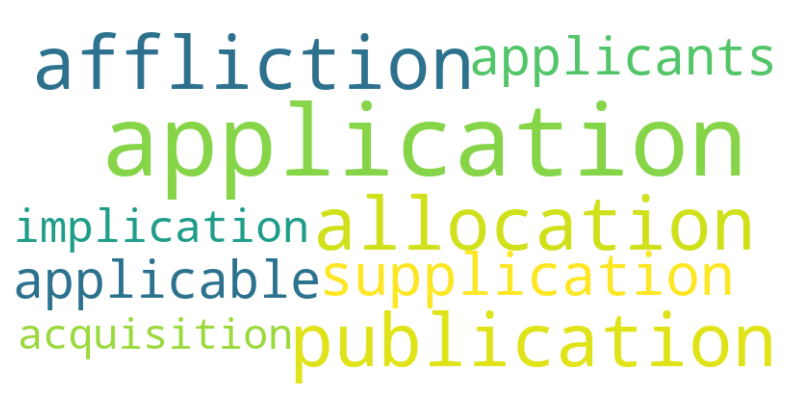

In [55]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_candidate_with_distance(state, word, word_list, max_candidates=20, distance_fn=damerau_levenshtein_distance):
    """
    Generate candidate words for a misspelled word, using a specified distance function
    between words. This function helps in spelling correction by finding close matches
    to the misspelled word in a given word list.

    :param state: List of words representing the current state in the text.
    :param word: The misspelled word for which candidates are to be generated.
    :param word_list: A list of words from the vocabulary to compare against.
    :param max_candidates: Maximum number of candidate words to return.
    :param distance_fn: A function to calculate the distance between two words. 
                        Defaults to Damerau-Levenshtein distance.
    :return: List of tuples, each containing a candidate sequence and its distance
             from the input word.
    """

    candidates = []

    for candidate in word_list:
        distance = distance_fn(word, candidate)

        candidates.append((candidate, distance))

    # Sort candidates by Distance distance in ascending order
    candidates.sort(key=lambda x: x[1])
    next_words = candidates[:max_candidates]

    # Return next word and distance
    return [(state + [next_word[0]], next_word[1]) for next_word in next_words]

# Example usage
misspelled_word = "apqlicathoo"
initial_state = ['<s>','<s>']
candidates = generate_candidate_with_distance(initial_state,misspelled_word, vocab, 10)

# Extract candidate words from the results
candidate_words = [cand[0][2] for cand in candidates]

# Create a string of candidate words separated by space
candidate_text = ' '.join(candidate_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(candidate_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
from nltk.tokenize import word_tokenize

def beam_search_spelling(sentence, beam_width, l1, l2, generate_candidates_fn, score_fn):
    """
    Spelling correction with context awareness using beam search.

    :param sentence: List of words in the sentence to be corrected.
    :param beam_width: Integer specifying the number of candidates to consider at each step.
    :param l1: Lambda parameter for linear interpolation in scoring function.
    :param l2: Lambda parameter for linear interpolation in scoring function.
    :param generate_candidates_fn: Function to generate candidate words.
    :param score_fn: Function to score the candidate sequences.
    :return: List of words representing the corrected sentence.
    """
    initial_state = ['<s>','<s>']
    candidates = [(initial_state, 0)]
    # sentence = word_tokenize(sentence)
    max_depth = len(sentence)
    for depth in range(max_depth):
        new_candidates = []
        for candidate, prob in candidates:
            for next_state, dist in generate_candidates_fn(candidate, sentence[depth],vocab):

                # Prob we add the previous prob, the prob of the next state and the inverse of the distance
                new_prob = prob + score_fn(next_state,len(vocab), trigram_counter, bigram_counter, prefixes_counter_tri,'trigram', dist, l1, l2)

                new_candidates.append((next_state, new_prob))


        new_candidates = sorted(new_candidates, key=lambda x: x[1], reverse=True)

        candidates = new_candidates[:beam_width]
    best_sequence, best_prob = max(candidates, key=lambda x: x[1])
    return best_sequence[2:]


test_sentence = word_tokenize("The deparmt office reprts ")
beam_width = 5
best_sequence = beam_search_spelling(test_sentence, beam_width, 0.9, 0.1, generate_candidate_with_distance, score)
print("The corrected sentence is", end=': ')
print(' '.join(best_sequence))  # Excluding the "<start>" token

The corrected sentence is: The depart office reports


## v) Evaluate your context-aware spelling corrector
The provided code introduces three functions to generate sentences with false spellings by randomly replacing characters in each word. The replace_characters function takes a sentence and a probability, replacing characters based on the given chance. The get_similar_char function returns a visually or acoustically similar character. The modify_corpus function applies these changes to each sentence in a corpus. In the example, the modified sentences are printed with a 10% chance of character replacement in each word. This code is a data augmentation technique, that will be used to evaluate our spelling corrector.

In [35]:
import random

def replace_characters(sentence, probability):
    """
    Generate sentences with false spellings by randomly replacing characters.

    :param sentence: List of words representing the input sentence.
    :param probability: Probability of replacing a character in a word.
    :return: List of words with false spellings.
    """
    modified_sentence = []
    for word in sentence:
        modified_word = ''
        for char in word:
            if char != ' ' and random.random() < probability:
                # Replace non-space character with a visually or acoustically similar character
                
                modified_char = get_similar_char(char)
                modified_word += modified_char
            else:
                modified_word += char
        modified_sentence.append(modified_word)
    return modified_sentence

def get_similar_char(char):
    """
    Returns a character similar to the input character based on a predefined mapping.

    :param char: A single character for which a similar character is sought.
    :return: A character similar to the input character based on the similar_chars dictionary. 
             If the input character is not in the dictionary, it returns the input character itself.
    """
    
    similar_chars = {'a': 'e', 'b': 'd', 'c': 'e', 'd': 'b', 'e': 'a', 'f': 'g',
                     'g': 'f', 'h': 'i', 'i': 'h', 'j': 'k', 'k': 'j', 'l': 'm',
                     'm': 'l', 'n': 'o', 'o': 'n', 'p': 'q', 'q': 'p', 'r': 's',
                     's': 'r', 't': 'u', 'u': 't', 'v': 'w', 'w': 'v', 'x': 'y',
                     'y': 'x', 'z': 'z'}
    return similar_chars.get(char, char)

def modify_corpus(corpus, probability):
    """
    Modifies the given corpus by randomly replacing characters in each sentence based on a specified probability.

    :param corpus: List of strings, where each string is a sentence in the corpus.
    :param probability: A float value between 0 and 1 representing the probability of each character being replaced.
    :return: A list of strings, where each string is a modified sentence from the original corpus.
    """
    modified_corpus = []
    for sentence in corpus:
        modified_sentence = replace_characters(sentence, probability)
        modified_corpus.append(modified_sentence)
    return modified_corpusMag

# Example usage with a probability of 0.1 (10% chance of replacing each non-space character)
modified_test_corpus = modify_corpus(cleaned_test_sentences, 0.1)



from tabulate import tabulate

# Display the first 5 modified sentences in a table
table_data = []
for i, sent in enumerate(modified_test_corpus[:5], start=1):
    table_data.append([i, ' '.join(sent)])

table_headers = ["Sentence Number", "Modified Sentence"]
table = tabulate(table_data, headers=table_headers, tablefmt="pretty")

print(table)


+-----------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Sentence Number |                                                                                                     Modified Sentence                                                                                                      |
+-----------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|        1        | Rodert D . Hunter , Chase Manhettan area execttive for Etsope , Afsice aod the Middle East , said at a newr conference that plans to bsoadeo the bank ' r activities on the Italian markau have not been <UNK> , iowever . |
|        2        |                 

## Visual representation of the Modified Sentence table above:
Here we are utilizing wordcloud to generate a visual representation of the misspelled text corpus

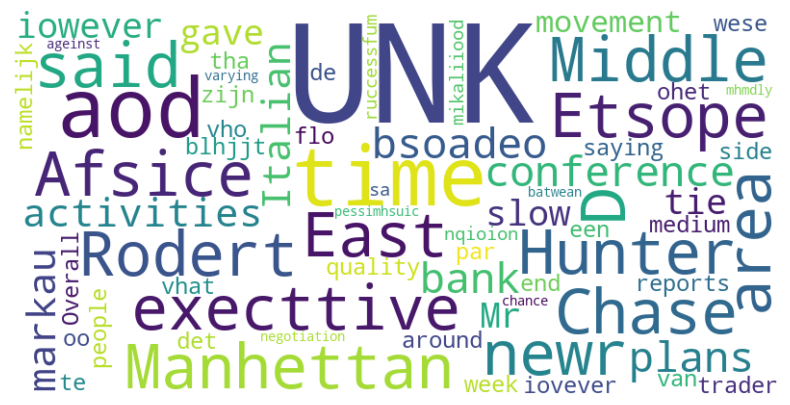

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the first 5 modified sentences into a single text for WordCloud
text_for_wordcloud = ' '.join([' '.join(sent) for sent in modified_test_corpus[:5]])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Display WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The following code introduces the correct_corpus_np function, which utilizes a spell-corrector based on beam search. It takes falsely spelled sentences as input and attempts to correct as many characters as possible in each word. The corrected corpus is generated using the beam search spell-corrector. The provided code then demonstrates the function by applying it to a portion of the original and modified test corpora, showcasing the original, modified, and corrected test corpora. The correction process involves beam search with a specified maximum number of candidates and uses a predefined set of vocabulary words, created by the techniques used previously in this notebook.

In [41]:
import numpy as np

# Take a portion of the test_corpus and modified_test_corpus
# Selecting all the test sentences might reach a bottleneck in cpu execution times!
org_sent = cleaned_test_sentences[:5]
wrg_sent = modified_test_corpus[:5]

def correct_corpus_np(corpus, vocab, max_candidates=5):
    """
    Spell-correct a given corpus using beam search.

    :param corpus: List of sentences to be spell-corrected.
    :param vocab: Set of valid vocabulary words.
    :param max_candidates: Maximum number of candidates to consider during beam search.
    :return: Spell-corrected corpus.
    """
    corrected_corpus = []
    # Wrap the loop with tqdm to create the progress bar
    with tqdm(total=len(corpus), desc="Correcting Sentences") as pbar:
        for sentence in corpus:
            corrected_sentence = beam_search_spelling(sentence, 3, 0, 1, generate_candidate_with_distance, score)
            corrected_corpus.append(corrected_sentence)
            pbar.update(1)  # Update the progress bar

    return corrected_corpus

corrected_test_corpus = correct_corpus_np(wrg_sent, vocab, 5)

print("Original Test Corpus:")
print(org_sent)

print("\nModified Test Corpus:")
print(wrg_sent)

print("\nCorrected Test Corpus:")
print(corrected_test_corpus)

Correcting Sentences: 100%|██████████| 5/5 [02:34<00:00, 30.81s/it]

Original Test Corpus:
[['Robert', 'D', '.', 'Hunter', ',', 'Chase', 'Manhattan', 'area', 'executive', 'for', 'Europe', ',', 'Africa', 'and', 'the', 'Middle', 'East', ',', 'said', 'at', 'a', 'news', 'conference', 'that', 'plans', 'to', 'broaden', 'the', 'bank', "'", 's', 'activities', 'on', 'the', 'Italian', 'market', 'have', 'not', 'been', '<UNK>', ',', 'however', '.'], ['Mr.', '<UNK>', 'gave', 'the', 'slow', 'movement', 'some', 'of', 'the', 'quality', 'of', 'a', '<UNK>', '<UNK>', '.'], ['From', 'time', 'to', 'time', 'the', 'medium', '<UNK>', 'other', 'people', '``', 'around', 'him', "''", ',', 'who', 'were', '``', 'on', 'the', 'other', 'side', "''", ',', 'and', 'reports', 'what', 'they', 'are', 'saying', '.'], ['<UNK>', 'blijkt', 'namelijk', 'dat', 'de', '<UNK>', 'niet', '<UNK>', 'zijn', 'een', '<UNK>', 'van', 'flo', '230', 'per', 'week', 'te', '<UNK>', '.'], ['Overall', ',', 'however', ',', 'trader', 'and', '<UNK>', 'opinion', 'on', 'the', 'likelihood', 'of', 'a', 'successful', 're',

## vi) Evaluate the context-aware spelling corrector in terms of Word Error Rate (WER) and Character Error Rate (CER)
The following code is a basic implementation of Word Error Rate(WER) and Character Error Rate(Metrics). In more detail, we are utilizing the modules provided by: https://huggingface.co/ in order to compute the WER and CER between the original test sentences(shown as references) and the corrected portion of the falsely spelled sentences(shows as predictions). Finally we display the results with the goal to make an inference about our correctors performance.

In [53]:
# !pip install evaluate
# !pip install jiwer
# !pip install prettytable

from prettytable import PrettyTable
from evaluate import load

cor_sent = corrected_test_corpus[:50]

# Flatten the list of lists
flattened_cor_sent = [' '.join(sentence) for sentence in cor_sent]
flattened_org_sent = [' '.join(sentence) for sentence in org_sent]
flattened_wrg_sent =  [' '.join(sentence) for sentence in wrg_sent]
# Transform predictions
predictions1 = [' '.join(flattened_cor_sent)]

references = [' '.join(flattened_org_sent)]

predictions2 = [' '.join(flattened_wrg_sent)]

"""Compute the respective WER and CER score that we need to evaluate the spelling corrector"""
wer1 = load("wer")  
wer_score1 = wer1.compute(predictions=predictions1, references=references)

wer2 = load("wer")  
wer_score2 = wer2.compute(predictions=predictions2, references=references)

cer1 = load("cer")
cer_score1 = cer1.compute(predictions=predictions1, references=references)

cer2 = load("cer")
cer_score2 = cer2.compute(predictions=predictions2, references=references)



# Create a table
table = PrettyTable()
table.field_names = ["Metric", "Corrected vs Original", "Artificial vs Original"]

# Add rows to the table
table.add_row(["Word Error Rate", f"{wer_score1:.3f}", f"{wer_score2:.3f}"])
table.add_row(["Char Error Rate", f"{cer_score1:.3f}", f"{cer_score2:.3f}"])

# Print the table
print(table)

+-----------------+-----------------------+------------------------+
|      Metric     | Corrected vs Original | Artificial vs Original |
+-----------------+-----------------------+------------------------+
| Word Error Rate |         0.106         |         0.227          |
| Char Error Rate |         0.029         |         0.069          |
+-----------------+-----------------------+------------------------+
